In [2]:
# Rain Prediction Using Logistic Regression 

In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

import os

In [11]:
# Data Preparation
# importing data

In [12]:
data = pd.read_csv('weatherAUS.csv')
data.sample(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
11866,2017-06-12,CoffsHarbour,14.3,16.8,26.8,NaN,NaN,SSW,43.0,SW,...,93.0,1023.5,1021.2,8.0,8.0,14.6,15.0,Yes,64.8,Yes
58923,2015-03-30,Bendigo,7.0,27.0,0.0,NaN,NaN,W,39.0,SSE,...,32.0,1023.8,1022.3,NaN,NaN,14.1,25.4,No,0.0,No
91733,2011-06-30,Townsville,17.9,26.4,0.4,7.2,8.0,SE,54.0,SSE,...,50.0,1022.2,1019.1,4.0,5.0,22.4,24.8,No,0.0,No
66576,2010-10-10,Melbourne,10.4,25.2,0.0,3.6,9.7,N,46.0,WNW,...,39.0,1029.7,1026.7,NaN,NaN,11.7,23.3,No,0.0,No
89111,2012-06-25,GoldCoast,14.5,20.2,0.0,NaN,NaN,S,41.0,S,...,53.0,1027.6,1024.6,NaN,NaN,17.1,19.5,No,0.0,No


In [13]:
# cleaning data

In [14]:
# Getting rid of the columns with objects which will not be used in our model:
data.drop(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RISK_MM'], axis=1, inplace=True)
data.head(5)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [15]:
# And we need to replace NaN values with mean values of each column:
data.fillna(data.mean(), inplace=True)
data.head(5)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,5.469824,7.624853,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8,No,No
1,7.4,25.1,0.0,5.469824,7.624853,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3,No,No
2,12.9,25.7,0.0,5.469824,7.624853,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.437189,2.000000,21.0,23.2,No,No
3,9.2,28.0,0.0,5.469824,7.624853,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.437189,4.503167,18.1,26.5,No,No
4,17.5,32.3,1.0,5.469824,7.624853,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No


In [16]:
# Converting Predictions to binary for Logistic Regression

In [17]:
# Now we can change that day and next days'predictions (yes and no) to 1 and 0:
data.RainToday = [1 if each == 'Yes' else 0 for each in data.RainToday]
data.RainTomorrow = [1 if each == 'Yes' else 0 for each in data.RainTomorrow]
data.sample(3)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
123756,15.3,29.3,0.0,5.469824,7.624853,46.0,9.0,7.0,66.0,34.0,1017.653758,1015.258204,4.437189,4.503167,20.7,28.0,0,1
92953,26.6,34.2,0.0,11.800000,10.400000,33.0,17.0,20.0,52.0,47.0,1009.900000,1008.800000,2.000000,2.000000,31.4,33.5,0,0
41751,18.8,26.5,0.0,5.469824,7.624853,57.0,9.0,20.0,79.0,84.0,1015.400000,1013.200000,4.437189,2.000000,22.9,22.5,0,0


In [18]:
# Excluding tomorrow's prediction from the dataset

y = data.RainTomorrow.values
x_data = data.drop('RainTomorrow', axis=1)
x_data.head()

In [20]:
# Normalization Progress
#In order to be able to analyse and visualize all feature values we need to scale all the values between 0 and 1. 
#This progress is called normalisation.
#Normalization formula = (x - min(x)) / (max(x) - min(x))

In [ ]:
# In order to scale all the features between 0 and 1:
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data))
x.head(5)

In [22]:
# Dividing Dataset for Training and Testing the Model
#80% of the dataset will be used for training the model and 20% will be used later for testing our model's accuracy.

In [23]:
# importing sklearn's library for splitting our dataset:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=75)

# For our matrix calculations we need to transpose our matrixis:
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

print('x_train shape is: ', x_train.shape)
print('y_train shape is: ', y_train.shape)
print('x_test shape is: ', x_test.shape)
print('y_test shape is: ', y_test.shape)

x_train shape is:  (17, 113754)
y_train shape is:  (113754,)
x_test shape is:  (17, 28439)
y_test shape is:  (28439,)


In [24]:
# Implementing Logistic Regression 

In [25]:
# creating the initial Parameters (weight and bias)

In [26]:
def initialize_weight_bias(dimension):
    w = np.full((dimension,1), 0.01)    # Create a matrix by the size of (dimension,1) and fill it with the values of 0.01
    b = 0.0
    return w,b

In [28]:
# Defining the Sigmoid Function
# Sigmoid Function is used to scale z values between 0 and 1. But this is not the same thing as the normalization.
# Sigmoid function is used for explaining propability.
# Let's say we have used our weight, bias and x values in this formula: z = w*x + b
# And let's say our result for z=5. And when we apply it to sigmoid function we have y_head=0.8
# That means our model's prediction's result is 1. 
# Because all y_head values above 0.5 (treshold value) on the graph are 1 in the sigmoid function graph. 
# If we have y_head = 0.4 that means our model's prediction is 0.

In [29]:
def sigmoid(z):
    y_head = 1 / (1 + np.exp(-z))
    return y_head

In [30]:
# Defining Forward and Backward Propagation
# Loss function tells us if our model's prediction is correct or wrong. 
# If the value of loss function is 1 that means our model's prediction is wrong.
# Loss (error) function formula = -(1 - y) log(1 - y_head) - y log(y_head)
# Cost function is the summation of all the loss functions. 
# If cost function is high that means our model makes more mistakes in it's predictions.

In [31]:
def forward_backward_propagation(w, b, x_train, y_train):
    # forward propagation:
    z = np.dot(w.T, x_train) + b
    y_head = sigmoid(z)
    
    loss = -(1 - y_train) * np.log(1 - y_head) - y_train * np.log(y_head)     # loss function formula
    cost = (np.sum(loss)) / x_train.shape[1]                               # cost function formula
    
    # backward propagation:
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    
    gradients = {'derivative_weight': derivative_weight, 'derivative_bias': derivative_bias}
    
    return cost, gradients

In [32]:
# Defining Update Parameters Method
# We are going to tell our model how many times to initiate forward and backward propagation.
# For this purpose we will use weight, bias, training datasets (x_train, y_train), 
# number of iteration (how many times to go for-back) 
#and our model's learning rate (how many steps our model uses while doing for-back propagation).

In [33]:
def update(w, b, x_train, y_train, learning_rate, nu_of_iteration):
    cost_list = []
    cost_list2 = []
    index = []
    
    # Initialize for-back propagation for the number of iteration times. 
    #Then updating w and b values and writing the cost values to a list:  
    for i in range(nu_of_iteration):
        cost, gradients = forward_backward_propagation(w, b, x_train, y_train)
        cost_list.append(cost)
    
        # Update weight and bias values:
        w = w - learning_rate * gradients['derivative_weight']
        b = b - learning_rate * gradients['derivative_bias']
        # Show every 20th value of cost:
        if i % 20 == 0:
            cost_list2.append(cost)
            index.append(i)
            print('Cost after iteration %i: %f' %(i,cost))
    
    parameters = {'weight': w, 'bias':b}
    
    # Visulization of cost values:
    plt.plot(index, cost_list2)
    plt.xlabel('Nu of Iteration')
    plt.ylabel('Cost Function Value')
    plt.show()
    
    return parameters, gradients, cost_list

In [34]:
# Defining Prediction Method
# Now we can define our prediction method. 
# For our model's training we have used training data but for prediction we will be using our test data.

In [35]:
def prediction(w, b, x_test):
    z = sigmoid(np.dot(w.T, x_test) + b)
    y_prediction = np.zeros((1,x_test.shape[1]))
    
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1
            
    return y_prediction

In [36]:
# Implementing Logistic Regression Using Test Data
# Now it's time for using our x_test data and defined methods to predict y_prediction values.
# Then we will use our predictions (y_test_predictions) and real y values (y_test) to compare and calculate our model's accuracy

In [37]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate, nu_of_iteration):
    dimension = x_train.shape[0]
    w, b = initialize_weight_bias(dimension)    # Creating an initial weight matrix of (x_train data[0] x 1)
    
    # Updating our w and b by using update method. 
    # Update method contains our forward and backward propagation.
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate, nu_of_iteration)
    
    # Lets use x_test for predicting y:
    y_test_predictions = prediction(parameters['weight'], parameters['bias'], x_test) 
    
    # Investigate the accuracy:
    print('Test accuracy: {}%'.format(100 - np.mean(np.abs(y_test_predictions - y_test))*100))

In [38]:
# Let's test our model. 
# Use logistic_regression method, train and test data, 
# with a learning rate of 1 and run the forward backward propagation 400 times to train our model. 
# And then show us our cost function (which should decline by the number of iterations) and accuracy of the model.

Cost after iteration 0: 0.711469
Cost after iteration 20: 0.457993
Cost after iteration 40: 0.431180
Cost after iteration 60: 0.418007
Cost after iteration 80: 0.409534
Cost after iteration 100: 0.403382
Cost after iteration 120: 0.398649
Cost after iteration 140: 0.394881
Cost after iteration 160: 0.391809
Cost after iteration 180: 0.389262
Cost after iteration 200: 0.387120
Cost after iteration 220: 0.385300
Cost after iteration 240: 0.383738
Cost after iteration 260: 0.382388
Cost after iteration 280: 0.381214
Cost after iteration 300: 0.380186
Cost after iteration 320: 0.379282
Cost after iteration 340: 0.378483
Cost after iteration 360: 0.377773
Cost after iteration 380: 0.377140


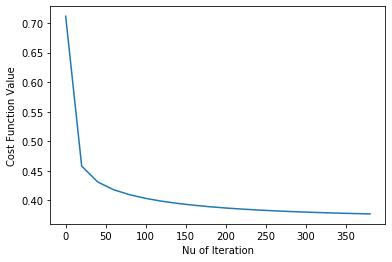

Test accuracy: 83.3221983895355%


In [39]:
logistic_regression(x_train, y_train, x_test, y_test, learning_rate=1, nu_of_iteration=400)

In [40]:
# LOGISTIC REGRESSION WITH SKLEARN LIBRARY

In [41]:
# Importing sklearn library for logistic regression:
from sklearn.linear_model import LogisticRegression

# Creating our model named 'lr'
lr = LogisticRegression()

# Training it by using our train data:
lr.fit(x_train.T, y_train.T)

# Printing our accuracy by using our trained model and test data:
print('Test accuracy of sklearn logistic regression library: {}'.format(lr.score(x_test.T, y_test.T)))

G:\software_installation_folder\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Test accuracy of sklearn logistic regression library: 0.8412391434297971


x_train shape is:  (17, 113754)
y_train shape is:  (113754,)
x_test shape is:  (17, 28439)
y_test shape is:  (28439,)
Cost after iteration 0: 0.711469
Cost after iteration 20: 0.457993
Cost after iteration 40: 0.431180
Cost after iteration 60: 0.418007
Cost after iteration 80: 0.409534
Cost after iteration 100: 0.403382
Cost after iteration 120: 0.398649
Cost after iteration 140: 0.394881
Cost after iteration 160: 0.391809
Cost after iteration 180: 0.389262
Cost after iteration 200: 0.387120
Cost after iteration 220: 0.385300
Cost after iteration 240: 0.383738
Cost after iteration 260: 0.382388
Cost after iteration 280: 0.381214
Cost after iteration 300: 0.380186
Cost after iteration 320: 0.379282
Cost after iteration 340: 0.378483
Cost after iteration 360: 0.377773
Cost after iteration 380: 0.377140


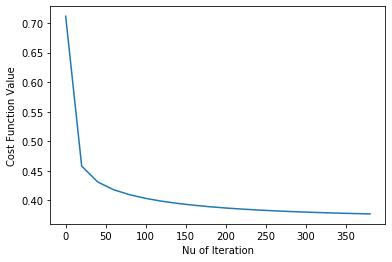

Test accuracy: 83.3221983895355%


G:\software_installation_folder\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Test accuracy of sklearn logistic regression library: 0.8412391434297971


In [42]:
# Rain Prediction Using Logistic Regression 

# This Python 3 environment comes with many helpful analytics libraries installed

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Data Preparation
# importing data

data = pd.read_csv('weatherAUS.csv')
data.sample(5)

# cleaning data

# Getting rid of the columns with objects which will not be used in our model:
data.drop(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RISK_MM'], axis=1, inplace=True)
data.head(5)

# And we need to replace NaN values with mean values of each column:
data.fillna(data.mean(), inplace=True)
data.head(5)

# Converting Predictions to binary for Logistic Regression

# Now we can change that day and next days'predictions (yes and no) to 1 and 0:
data.RainToday = [1 if each == 'Yes' else 0 for each in data.RainToday]
data.RainTomorrow = [1 if each == 'Yes' else 0 for each in data.RainTomorrow]
data.sample(3)

# Excluding tomorrow's prediction from the dataset

y = data.RainTomorrow.values
x_data = data.drop('RainTomorrow', axis=1)
x_data.head()

# Normalization Progress
# In order to be able to analyse and visualize all feature values we need to scale all the values between 0 and 1. 
# This progress is called normalisation.
# Normalization formula = (x - min(x)) / (max(x) - min(x))

# In order to scale all the features between 0 and 1:
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data))
x.head(5)

# Dividing Dataset for Training and Testing the Model
#80% of the dataset will be used for training the model and 20% will be used later for testing our model's accuracy.

# importing sklearn's library for splitting our dataset:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=75)

# For our matrix calculations we need to transpose our matrixis:
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

print('x_train shape is: ', x_train.shape)
print('y_train shape is: ', y_train.shape)
print('x_test shape is: ', x_test.shape)
print('y_test shape is: ', y_test.shape)

# Implementing Logistic Regression 
# creating the initial Parameters (weight and bias)

def initialize_weight_bias(dimension):
    w = np.full((dimension,1), 0.01)    # Create a matrix by the size of (dimension,1) and fill it with the values of 0.01
    b = 0.0
    return w,b

# Defining the Sigmoid Function
# Sigmoid Function is used to scale z values between 0 and 1. But this is not the same thing as the normalization.
# Sigmoid function is used for explaining propability.
# Let's say we have used our weight, bias and x values in this formula: z = w*x + b
# And let's say our result for z=5. And when we apply it to sigmoid function we have y_head=0.8
# That means our model's prediction's result is 1. 
# Because all y_head values above 0.5 (treshold value) on the graph are 1 in the sigmoid function graph. 
# If we have y_head = 0.4 that means our model's prediction is 0.

def sigmoid(z):
    y_head = 1 / (1 + np.exp(-z))
    return y_head

# Defining Forward and Backward Propagation
# Loss function tells us if our model's prediction is correct or wrong. 
# If the value of loss function is 1 that means our model's prediction is wrong.
# Loss (error) function formula = -(1 - y) log(1 - y_head) - y log(y_head)
# Cost function is the summation of all the loss functions. 
# If cost function is high that means our model makes more mistakes in it's predictions.

def forward_backward_propagation(w, b, x_train, y_train):
    # forward propagation:
    z = np.dot(w.T, x_train) + b
    y_head = sigmoid(z)
    
    loss = -(1 - y_train) * np.log(1 - y_head) - y_train * np.log(y_head)     # loss function formula
    cost = (np.sum(loss)) / x_train.shape[1]                               # cost function formula
    
    # backward propagation:
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    
    gradients = {'derivative_weight': derivative_weight, 'derivative_bias': derivative_bias}
    
    return cost, gradients

# Defining Update Parameters Method
# We are going to tell our model how many times to initiate forward and backward propagation.
# For this purpose we will use weight, bias, training datasets (x_train, y_train), 
# number of iteration (how many times to go for-back) 
#and our model's learning rate (how many steps our model uses while doing for-back propagation).

def update(w, b, x_train, y_train, learning_rate, nu_of_iteration):
    cost_list = []
    cost_list2 = []
    index = []
    
    # Initialize for-back propagation for the number of iteration times. 
    #Then updating w and b values and writing the cost values to a list:  
    for i in range(nu_of_iteration):
        cost, gradients = forward_backward_propagation(w, b, x_train, y_train)
        cost_list.append(cost)
    
        # Update weight and bias values:
        w = w - learning_rate * gradients['derivative_weight']
        b = b - learning_rate * gradients['derivative_bias']
        # Show every 20th value of cost:
        if i % 20 == 0:
            cost_list2.append(cost)
            index.append(i)
            print('Cost after iteration %i: %f' %(i,cost))
    
    parameters = {'weight': w, 'bias':b}
    
    # Visulization of cost values:
    plt.plot(index, cost_list2)
    plt.xlabel('Nu of Iteration')
    plt.ylabel('Cost Function Value')
    plt.show()
    
    return parameters, gradients, cost_list

# Defining Prediction Method
# Now we can define our prediction method. 
# For our model's training we have used training data but for prediction we will be using our test data.

def prediction(w, b, x_test):
    z = sigmoid(np.dot(w.T, x_test) + b)
    y_prediction = np.zeros((1,x_test.shape[1]))
    
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1
            
    return y_prediction

# Implementing Logistic Regression Using Test Data
# Now it's time for using our x_test data and defined methods to predict y_prediction values.
# Then we will use our predictions (y_test_predictions) and real y values (y_test) to compare and calculate our model's accuracy

def logistic_regression(x_train, y_train, x_test, y_test, learning_rate, nu_of_iteration):
    dimension = x_train.shape[0]
    w, b = initialize_weight_bias(dimension)    # Creating an initial weight matrix of (x_train data[0] x 1)
    
    # Updating our w and b by using update method. 
    # Update method contains our forward and backward propagation.
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate, nu_of_iteration)
    
    # Lets use x_test for predicting y:
    y_test_predictions = prediction(parameters['weight'], parameters['bias'], x_test) 
    
    # Investigate the accuracy:
    print('Test accuracy: {}%'.format(100 - np.mean(np.abs(y_test_predictions - y_test))*100))

# Let's test our model. 
# Use logistic_regression method, train and test data, 
# with a learning rate of 1 and run the forward backward propagation 400 times to train our model. 
# And then show us our cost function (which should decline by the number of iterations) and accuracy of the model.

logistic_regression(x_train, y_train, x_test, y_test, learning_rate=1, nu_of_iteration=400)

# LOGISTIC REGRESSION WITH SKLEARN LIBRARY# Importing sklearn library for logistic regression:
from sklearn.linear_model import LogisticRegression

# Creating our model named 'lr'
lr = LogisticRegression()

# Training it by using our train data:
lr.fit(x_train.T, y_train.T)

# Printing our accuracy by using our trained model and test data:
print('Test accuracy of sklearn logistic regression library: {}'.format(lr.score(x_test.T, y_test.T)))